In [ ]:
# Manipulação, visualização de dados e de sistemas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
import os

# Pré-processamento de dados 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Modelos de sklearn - Classificação
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    AdaBoostClassifier, RandomForestClassifier,
    GradientBoostingClassifier, HistGradientBoostingClassifier,
    ExtraTreesClassifier, BaggingClassifier
)

# Modelos externos - Classificação
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Métricas de desempenho
from sklearn.metrics import (
    classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve, precision_recall_curve,
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')

##### Pré-processamento
- 1 - Divisão da base entre treino e teste (80/20)
- 2 - Codificiar a Education por meio de OHE (One Hot Encoder)
- 3 - Robust Scaler foi escolhido, por não ser afetado por outliers como Sandard Scaler e MinMaxScaler

In [68]:
df = pd.read_parquet("../data/dados_banco.parquet")

In [69]:
def map_education(X):
    X = X.copy()
    X['Education'] = X['Education'].replace({
        1: 'Graduacao',
        2: 'Mestrado',
        3: 'Nível Avançado'
    })
    return X

In [70]:
# 2 - Codificar a variável Education
education_transformer = FunctionTransformer(map_education, validate=False)
df = education_transformer.fit_transform(df)

In [71]:
X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df['Personal.Loan']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [73]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.904
y_train - Proporção da classe 1: 0.096
X_test - Proporção da classe 0: 0.904
y_test - Proporção da classe 1: 0.096


In [74]:
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
categorical_features = ['Education']

In [75]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [76]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [77]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

##### Treino - Com a base geral

🔍 LogisticRegression 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.83      0.70      0.76        96

    accuracy                           0.96      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.95      0.96      0.96      1000

ROC AUC score: 0.9550


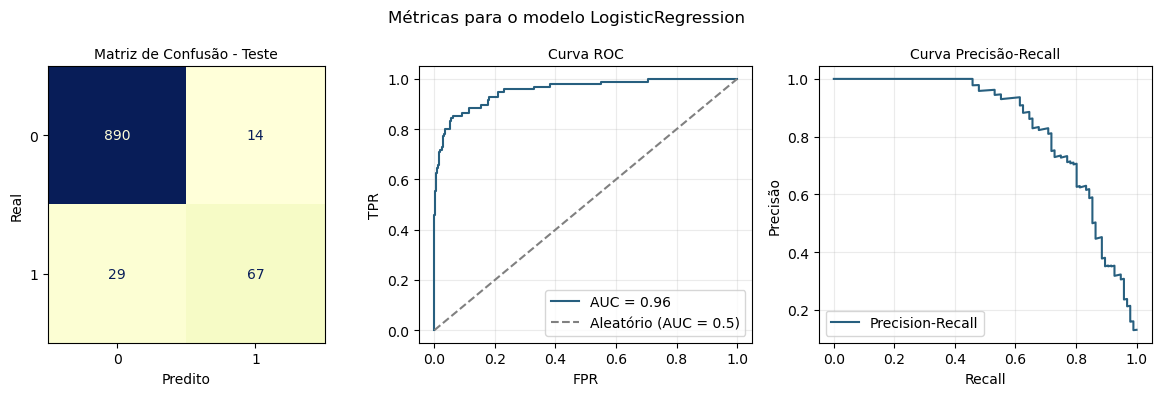

🔍 DecisionTree 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.91      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9742


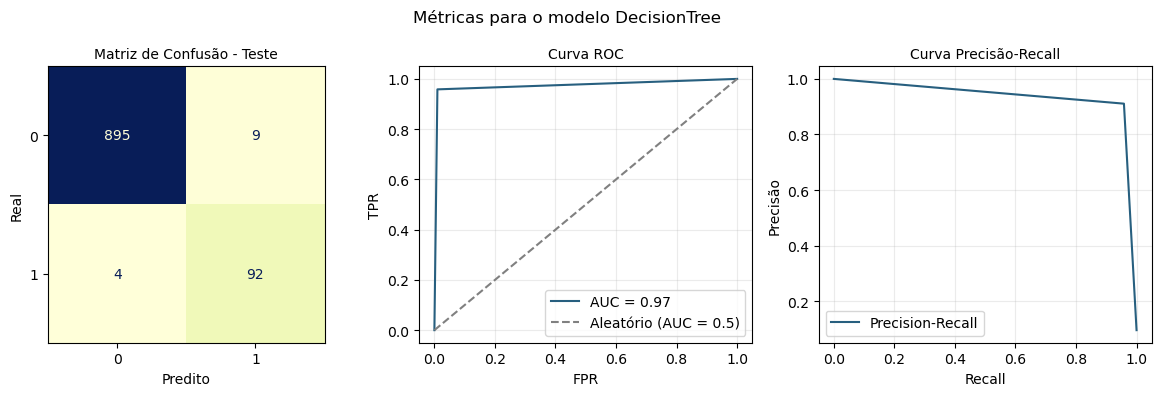

🔍 KNN 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.69      0.80        96

    accuracy                           0.97      1000
   macro avg       0.97      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9479


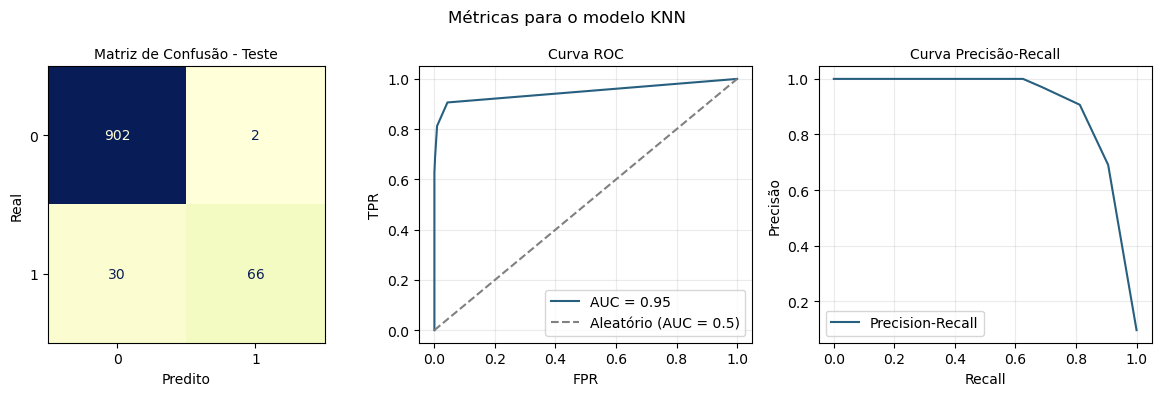

🔍 AdaBoost 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.84      0.83      0.84        96

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9848


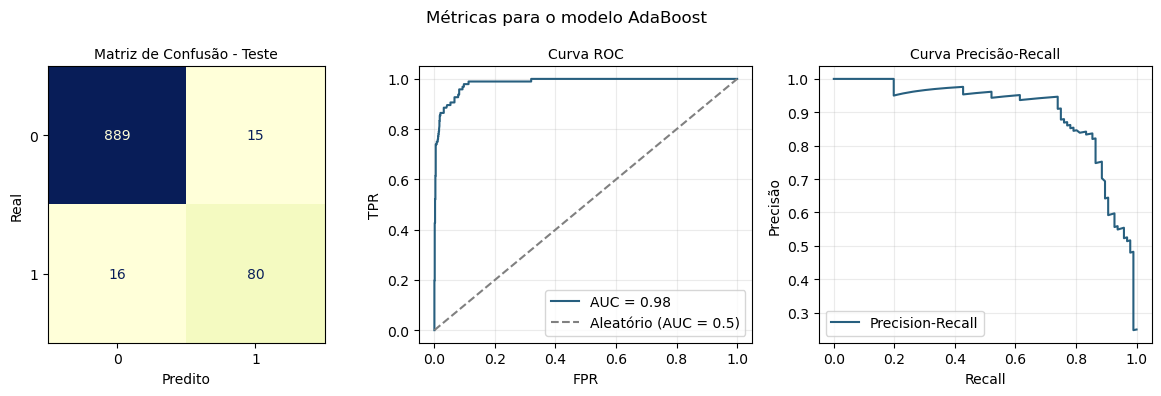

🔍 RandomForest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9985


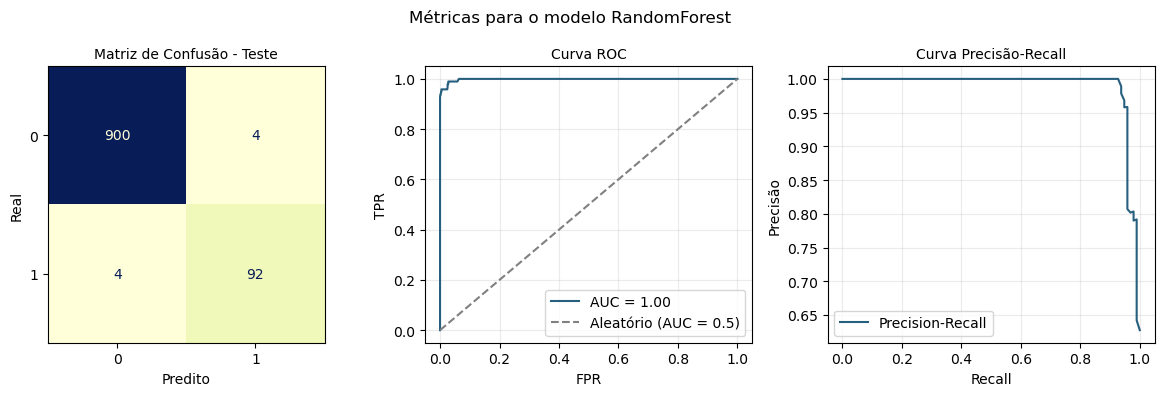

🔍 XGBoost 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.94      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9989


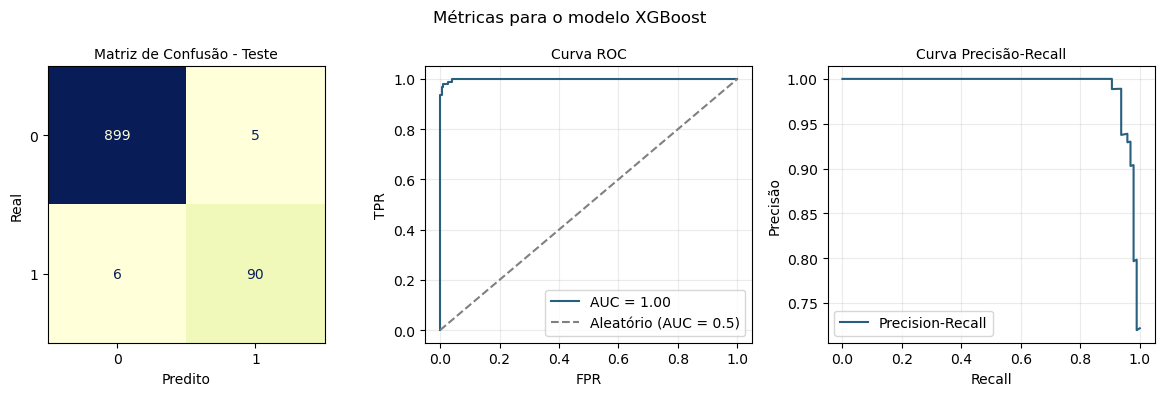

🔍 SVC 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.96      0.79      0.87        96

    accuracy                           0.98      1000
   macro avg       0.97      0.89      0.93      1000
weighted avg       0.98      0.98      0.98      1000

ROC AUC score: 0.9933


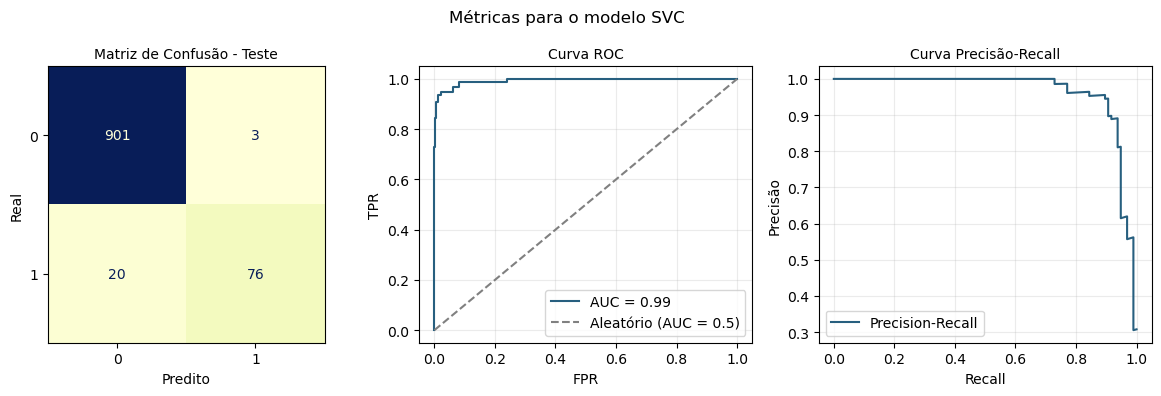

🔍 NaiveBayes 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       904
           1       0.53      0.64      0.58        96

    accuracy                           0.91      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.92      0.91      0.91      1000

ROC AUC score: 0.9401


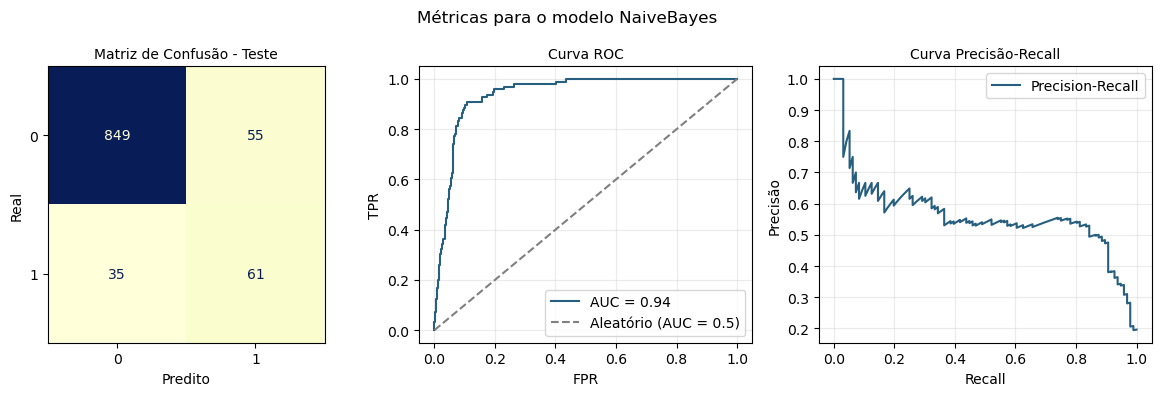

🔍 RidgeClassifier 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       904
           1       0.93      0.29      0.44        96

    accuracy                           0.93      1000
   macro avg       0.93      0.64      0.70      1000
weighted avg       0.93      0.93      0.91      1000

ROC AUC score: 0.9624


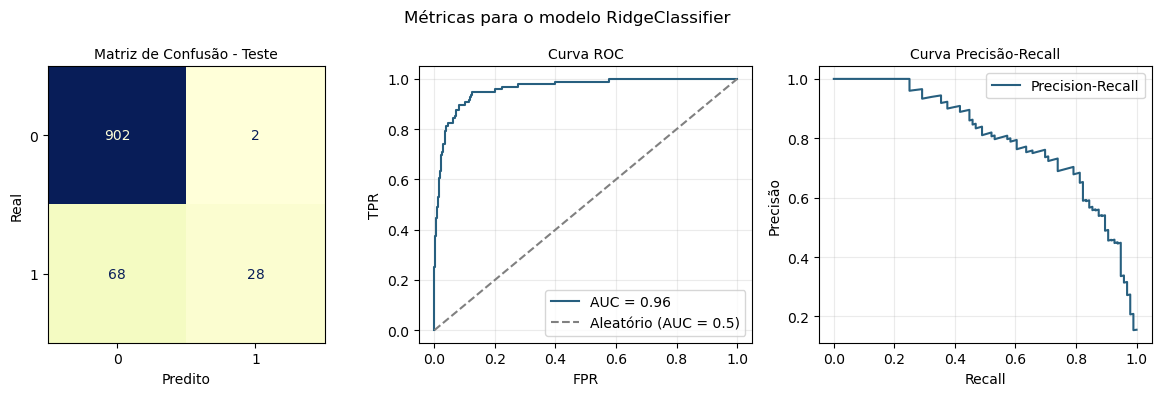

🔍 GradientBoosting 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.91      0.95      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9987


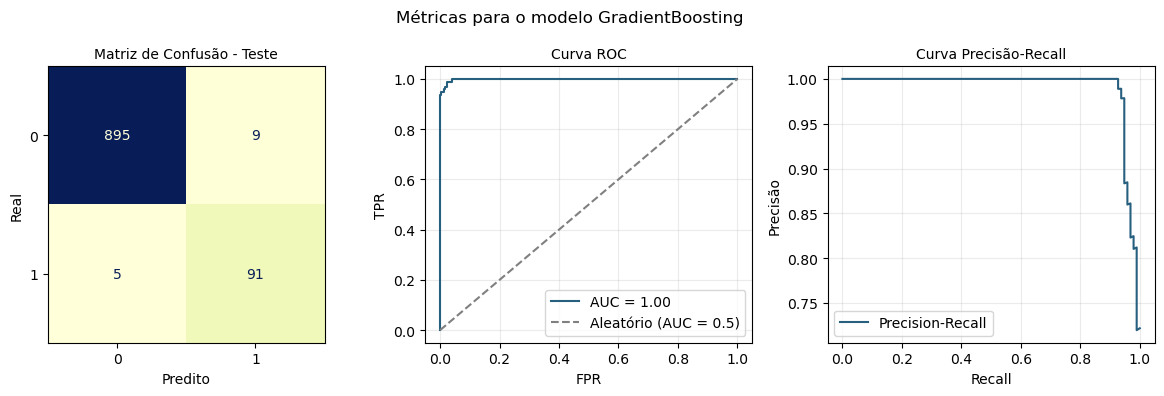

🔍 HistGradientBoosting 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.95      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9994


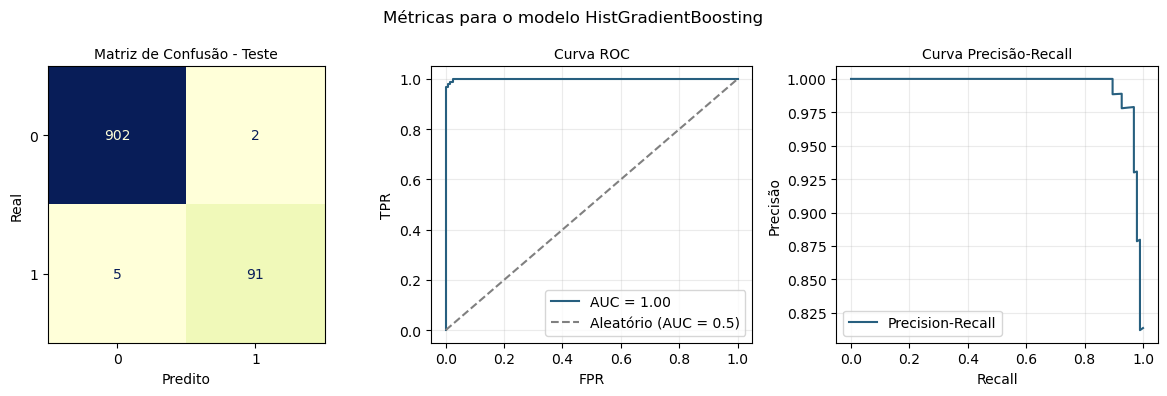

🔍 ExtraTrees 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       1.00      0.92      0.96        96

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9995


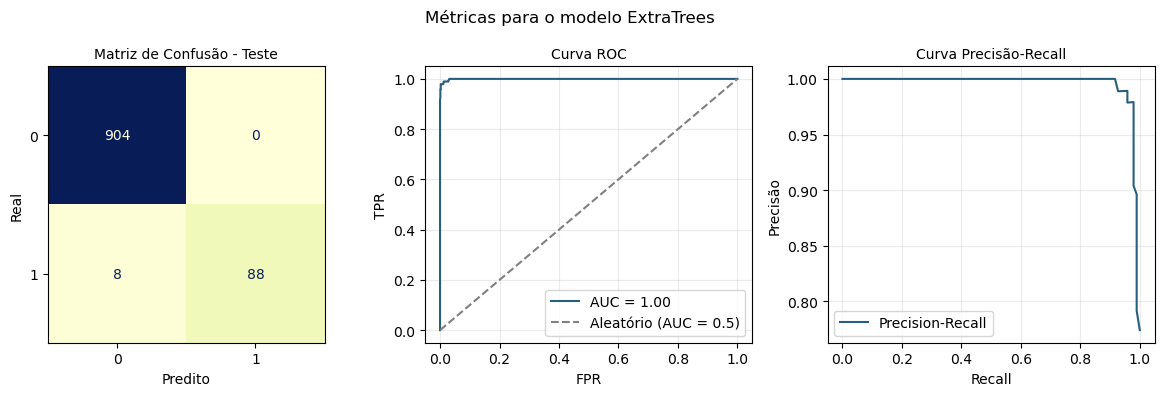

🔍 Bagging 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.93      0.95      0.94        96

    accuracy                           0.99      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9935


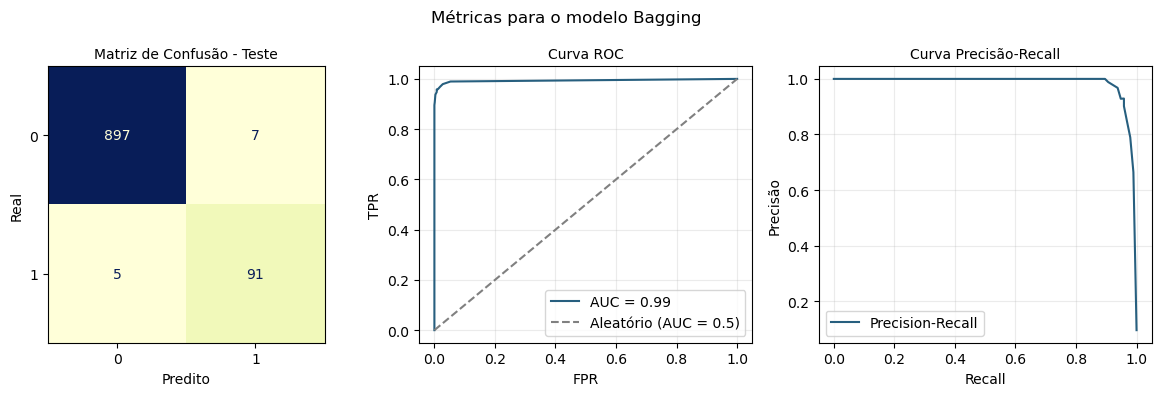

[LightGBM] [Info] Number of positive: 384, number of negative: 3616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

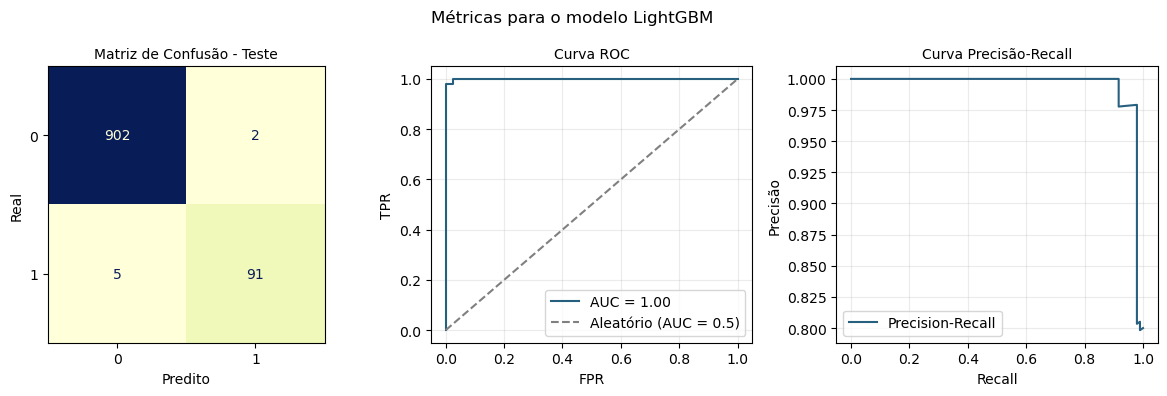

In [78]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

paleta = sns.color_palette('YlGnBu_d')

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Geração de probabilidades
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        print(f'{model_name} não possui método de predição de probabilidade. Pulando ROC/AUC.')
        continue  # Pula o restante do loop para modelos sem suporte

    print(f'🔍 {model_name} \n{classification_report(y_test, y_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle(f'Métricas para o modelo {model_name}')

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax=ax[0])
    ax[0].set_title('Matriz de Confusão - Teste', fontsize=10)
    ax[0].set_xlabel('Predito')
    ax[0].set_ylabel('Real')

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    ax[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color=paleta[4])
    ax[1].plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', color='gray')
    ax[1].set_title('Curva ROC', fontsize=10)
    ax[1].set_xlabel('FPR')
    ax[1].set_ylabel('TPR')
    ax[1].legend(loc='lower right')
    ax[1].grid(alpha=0.25)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ax[2].plot(recall, precision, label='Precision-Recall', color=paleta[4])
    ax[2].set_title('Curva Precisão-Recall', fontsize=10)
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precisão')
    ax[2].legend(loc='best')
    ax[2].grid(alpha=0.25)

    plt.tight_layout()
    plt.show()

In [79]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}
resumo_metricas = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        y_pred_proba = None
    
    resumo_metricas.append({
        'Modelo': model_name,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score (macro avg)': f1_score(y_test, y_pred, average="macro"),
        'F1-score (weighted)': f1_score(y_test, y_pred, average="weighted"),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    })

df_metricas = pd.DataFrame(resumo_metricas)
df_metricas = df_metricas.sort_values(by='F1-score (macro avg)', ascending=False).reset_index(drop=True)

df_metricas

[LightGBM] [Info] Number of positive: 384, number of negative: 3616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Modelo,Acurácia,Precisão,Recall,F1-score (macro avg),F1-score (weighted),ROC AUC
0,HistGradientBoosting,0.993,0.978495,0.947917,0.979549,0.992950,0.999389
1,LightGBM,0.993,0.978495,0.947917,0.979549,0.992950,0.999320
2,RandomForest,0.992,0.958333,0.958333,0.976954,0.992000,0.998473
3,ExtraTrees,0.992,1.000000,0.916667,0.976058,0.991844,0.999487
4,XGBoost,0.989,0.947368,0.937500,0.968164,0.988974,0.998928
5,Bagging,0.988,0.928571,0.947917,0.965750,0.988055,0.993484
6,DecisionTree,0.987,0.910891,0.958333,0.963400,0.987147,0.974189
7,GradientBoosting,0.986,0.910000,0.947917,0.960405,0.986127,0.998744
8,SVC,0.977,0.962025,0.791667,0.927984,0.975990,0.993305
9,AdaBoost,0.969,0.842105,0.833333,0.910280,0.968927,0.984796


### Resumo dos Modelos Avaliados

- **HistGradientBoosting, LightGBM e RandomForest** foram os melhores modelos:
  - Acurácia acima de 0.99 e ROC AUC ~0.999.
  - Excelente equilíbrio entre precisão e recall.
  - Recomendados para produção com alta performance.

- **ExtraTrees, XGBoost e Bagging** também tiveram ótimo desempenho:
  - ExtraTrees com precisão perfeita.
  - XGBoost e Bagging com alta estabilidade e ótimo AUC.

- **GradientBoosting, DecisionTree e SVC** tiveram desempenho sólido:
  - GradientBoosting com excelente AUC, levemente inferior em F1.
  - DecisionTree com alto recall.
  - SVC com excelente precisão, mas recall mais baixo.

- **AdaBoost e KNN** tiveram desempenho mediano:
  - AdaBoost equilibrado, mas inferior ao XGBoost.
  - KNN com alta precisão, mas recall limitado.

- **Modelos com desempenho mais fraco**:
  - **LogisticRegression**: bom baseline, mas recall abaixo do ideal.
  - **NaiveBayes**: baixa precisão, desempenho fraco.
  - **RidgeClassifier**: alta precisão, mas recall muito baixo.

#### Importância dos modelos

In [80]:
best_model_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(max_depth=30, random_state=42))
])
best_model_rf.fit(X_train, y_train)

best_model_hist = Pipeline(steps=[
    ('classifier', HistGradientBoostingClassifier(random_state=42))
])
best_model_hist.fit(X_train, y_train)

best_model_lgbm = Pipeline(steps=[
    ('classifier', LGBMClassifier(random_state=42))
])
best_model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 384, number of negative: 3616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Pipeline(steps=[('classifier', LGBMClassifier(random_state=42))])

In [ ]:
ohe = preprocessor.transformers_[1][1]
categorical_columns = ohe.get_feature_names_out(input_features=categorical_features)
all_columns = numerical_features + list(categorical_columns)

paleta = sns.color_palette('YlGnBu')

def plot_feature_importance(model, model_name, color, nota='', X=X_test, y=y_test):
    try:
        importances = model.named_steps['classifier'].feature_importances_
        origem = 'builtin'
    except AttributeError:
        try:
            importances = model.named_steps['classifier']._predictor.feature_importances_
            origem = 'builtin'
        except AttributeError:
            resultado_perm = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
            importances = resultado_perm.importances_mean
            origem = 'permutation'

    df_importancia = pd.DataFrame({
        'Feature': all_columns,
        'Importância': importances
    }).sort_values(by='Importância', ascending=True)
    df_importancia['Importância'] = df_importancia['Importância'].round(3)

    plt.figure(figsize=(5, 5))
    ax = sns.barplot(data=df_importancia, y='Feature', x='Importância', color=color, edgecolor=color)
    ax.bar_label(ax.containers[0], labels=[f'{v:.3f}' for v in df_importancia['Importância']], fontsize=10)
    plt.xlabel('Importância' if origem == 'builtin' else 'Importância (permutation)')
    plt.ylabel('')
    plt.title(f'Importância das Variáveis - {model_name}', y=1.05, fontsize=10)
    legenda = nota if origem == 'builtin' else 'baseado em queda de desempenho ao embaralhar'
    plt.figtext(0.5, 0.9, legenda, ha='center', color='gray', fontsize=9)
    plt.gca().invert_yaxis()
    sns.despine(left=True)
    plt.show()

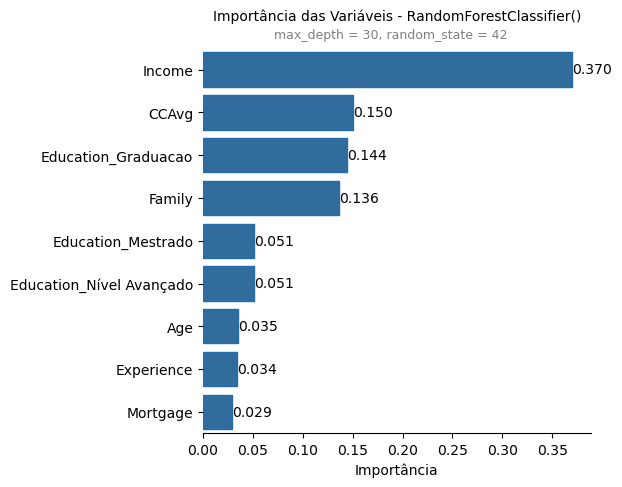

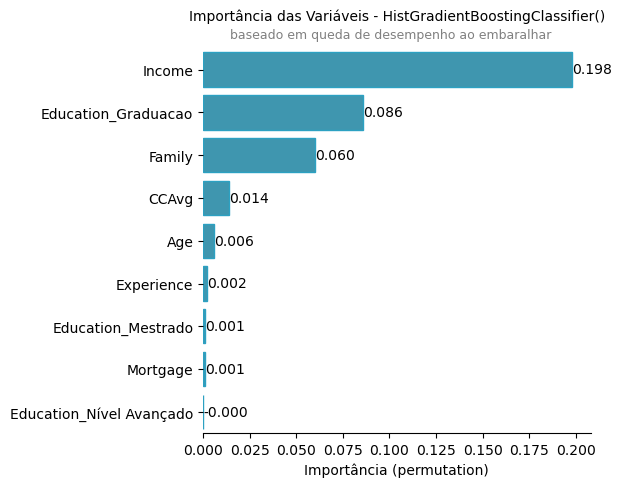

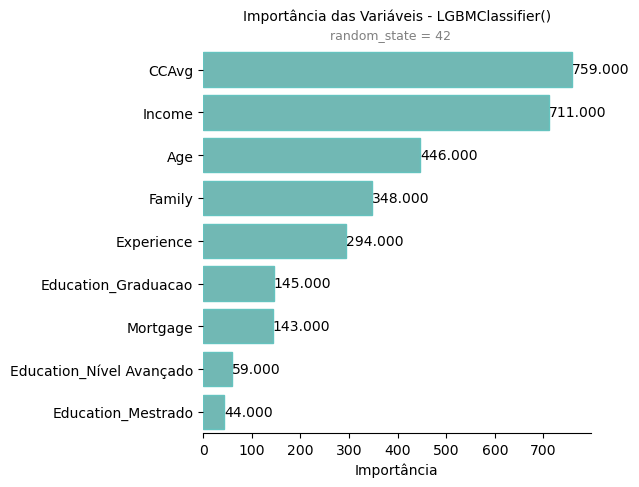

In [82]:
plot_feature_importance(best_model_rf, 'RandomForestClassifier()', paleta[4], 'max_depth = 30, random_state = 42')
plot_feature_importance(best_model_hist, 'HistGradientBoostingClassifier()', paleta[3], 'random_state = 42')
plot_feature_importance(best_model_lgbm, 'LGBMClassifier()', paleta[2], 'random_state = 42')

### Comparação e Conclusão

- **`Income`**:
  - Todos os modelos concordam que é a **variável mais importante ou a segunda mais importante**.
  - É essencial para prever a **aprovação de empréstimo**.

- **`CCAvg`**:
  - **Mais importante no LightGBM**.
  - **Muito relevante no RandomForest**.
  - **Desvalorizada no HistGradientBoosting** — possível sinal de como o modelo reage à **correlação entre variáveis**.

- **Educação (`Education_Graduacao`)**:
  - Tem impacto relevante no **RandomForest** e no **HistGradientBoosting**.
  - **Muito menos valorizada no LightGBM**.

- **Perfis dos modelos**:
  - **HistGradientBoosting**: visão **mais concentrada** — poucas variáveis explicam a maior parte da variação.
  - **LightGBM**: considera **mais variáveis como relevantes**, o que pode indicar **maior sensibilidade ou menor regularização**.

#### Testando o modelo com as bases de teste

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42))
])

hist_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', HistGradientBoostingClassifier(random_state=42))
])

lgbm_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

In [ ]:
X = df.drop(columns=['ID', 'ZIP.Code', 'Personal.Loan'])
y = df['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:

rf_model.fit(X_train, y_train)
hist_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_train)
hist_preds = hist_model.predict(X_train)
lgbm_preds = lgbm_model.predict(X_train)

[LightGBM] [Info] Number of positive: 384, number of negative: 3616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096000 -> initscore=-2.242481
[LightGBM] [Info] Start training from score -2.242481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [90]:
resultado_treino = pd.DataFrame({
    'ID': df.loc[X_train.index, 'ID'],
    'random_forest': rf_preds,
    'hist_gradient_boosting': hist_preds,
    'lightgbm': lgbm_preds
})

In [93]:
os.makedirs('../outputs', exist_ok=True)

resultado_treino.to_csv('../outputs/resultado_treino_modelos.csv', index=False)